# <span style='color:White'> **Video Game Sales Project**   </span>
## Data Source: GREGORYSMITH (Kaggle) - https://www.kaggle.com/datasets/gregorut/videogamesales
## Last updated: 6/4/2023

Skills were used:
- Pandas (groupby, sort_values)
- For loop
- Numpy (np.select)
- Matplotlib (plt.plot, plt.pie, plt.bar)

In [25]:
# import modules

import pandas as pd # must have module for data analysis
import numpy as np # for numerical analysis
import matplotlib.pyplot as plt # for visualization

In [26]:
# Reading the data

df = pd.read_csv('/Users/clementcheng/Downloads/video games/vgsales.csv')

In [27]:
# Basic characteristic of our dataset

print(df.head())
print(df.info())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

## <span style='color:White'> **Data Processing**   </span>

In [28]:
# Since there is null value in [Year] & [Publisher], therefore, we will drop the null value from the dataset

df.dropna(inplace=True)

# Moreover, for ['Year'] column, it has showed as float64 (e.g. 2006.0),
# therefore we need to change the data type to int64 (e.g. 2006)

df['Year'] = df['Year'].astype('int64')

In [29]:
# Check for NA values and duplicates

print(df.isnull().sum())

print(df.duplicated().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
0


- It seems the data is clean for further analysis.

## <span style='color:White'> **Data Analysis**   </span>

In [30]:
# Having descriptive analysis in the data

df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


#### Observation:
- This dataset contains of video games from 1980 - 2020.
- NA Sales contributes the largest portion in global sales, then EU, then Japan. 

#### 

### Next, I am going to add a century column and seperate the datasets into four dataframe for comparison between decades.

1. 1980 - 1989 <- 80 century
2. 1990 - 1999 <- 90 century
3. 2000 - 2010 <- 00 century
4. 2010 - 2020 <- 10 century

In [31]:
# Create a list of our conditions
Conditions = [
    (df['Year'] >= 1980) & (df['Year']<1990),
    (df['Year'] >= 1990) & (df['Year']<2000),
    (df['Year'] >= 1980) & (df['Year']<2010),
    (df['Year'] >= 2010)
    ]

# Create a list of the values we want to assign for each condition
Century = ['80 century', '90 century', '00 century', '10 century']

# Create a new column and use np.select to assign values to it using our lists as arguments
df['Century'] = np.select(Conditions, Century)

# Display updated DataFrame
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Century
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,00 century
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80 century
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,00 century
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,00 century
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90 century


In [32]:
# Create new dataframe based on century

c80 = df[df["Century"] == '80 century']
c90 = df[df["Century"] == '90 century']
c00 = df[df["Century"] == '00 century']
c10 = df[df["Century"] == '10 century']

list = [c80, c90, c00, c10]

# Create a loop for observating the percentage of each century compare to the original dataframe
for t in list:
# The first number is the percentage of each century / total rows in the dateframe
# The right number is the total rows in each century
    print('{}% - {}'.format(round(len(t)/len(df) * 100), len(t)))

1% - 205
11% - 1769
56% - 9183
32% - 5134


#### As the sample size has big difference between each decades, therefore during the data analysis,
#### percentage of 4 dataframes will be used for tracking trends and patterns

## Overall Analysis

Text(0, 0.5, 'Sales in million')

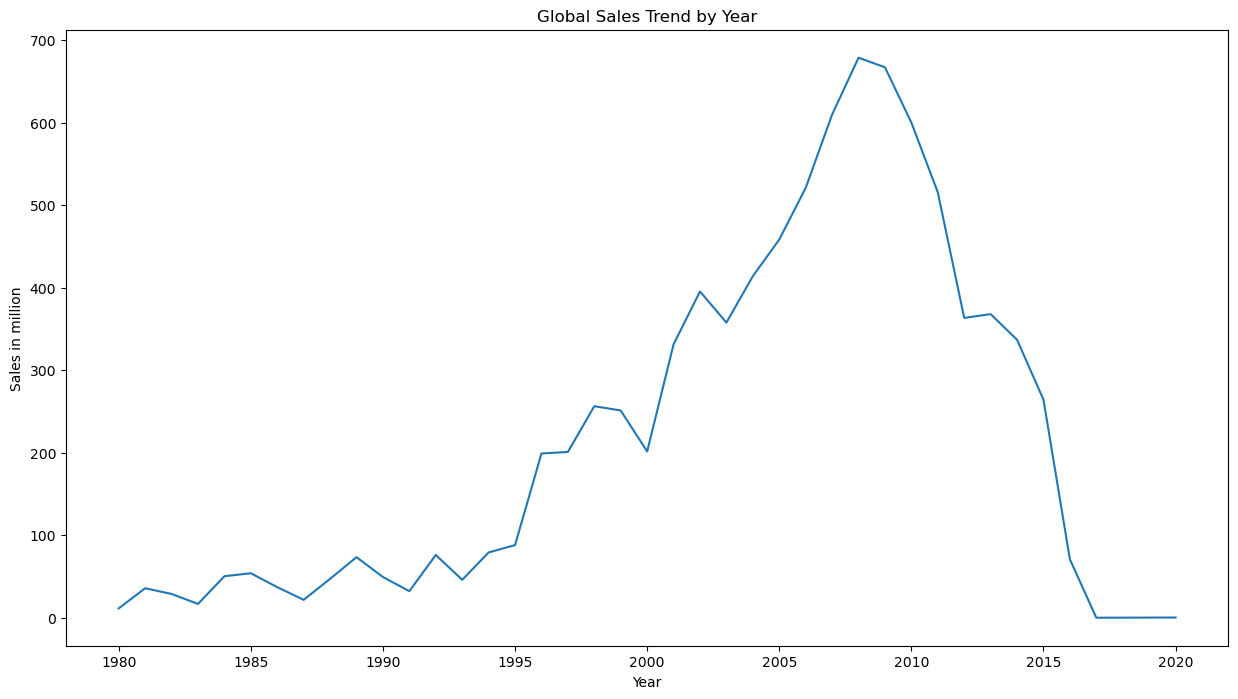

In [33]:
# Year trend in global sales

YT = df.groupby(['Year'])['Global_Sales'].sum().reset_index()
YT

plt.figure(figsize=(15,8))
plt.plot(YT['Year'], YT['Global_Sales'])
plt.title('Global Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Sales in million')

### Observation:
- Video game global sales has an increasing trend from 1980 - 2008, however, it started decline after 2008,
   it may due to smartphone market arise or the sample size is incomplete for the latest period.
- As there was a huge difference in the data size between each century, and we want to analysis the latest data,
   therefore, in the next session, only 00 century and 10 century will be used.

In [34]:
# EDA 1: Find Genre proportion in each decade, to observe any difference in these years.
g3 = c00['Genre'].value_counts().reset_index()
g4 = c10['Genre'].value_counts().reset_index()

g3

,index,Genre
0,Action,1585
1,Sports,1407
2,Misc,999
3,Racing,801
4,Role-Playing,732
5,Shooter,720
6,Adventure,633
7,Platform,567
8,Simulation,552
9,Fighting,442


Text(0.5, 1.0, 'Genre Distribution in 00 century')

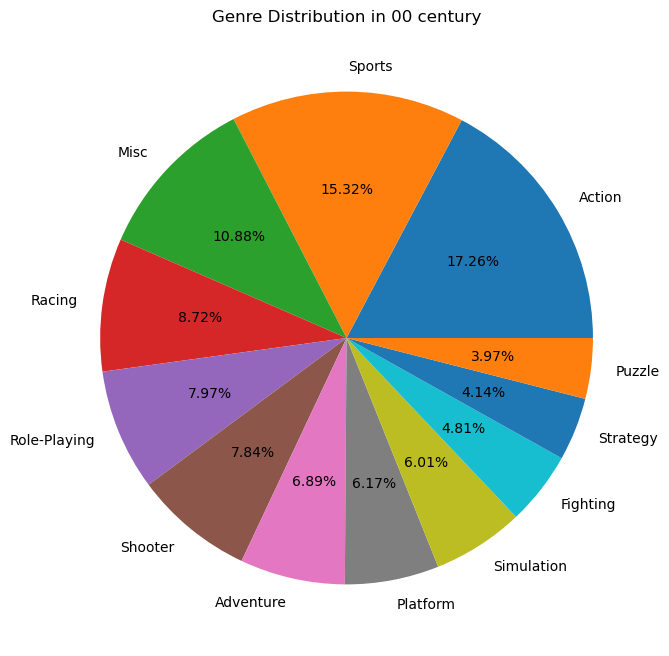

In [35]:
# 00 Century Genre Distribution
plt.figure(figsize=(15,8))
plt.pie(x=g3['Genre'], labels=g3['index'], autopct='%.2f%%')
plt.title('Genre Distribution in 00 century')

Text(0.5, 1.0, 'Genre Distribution in 10 century')

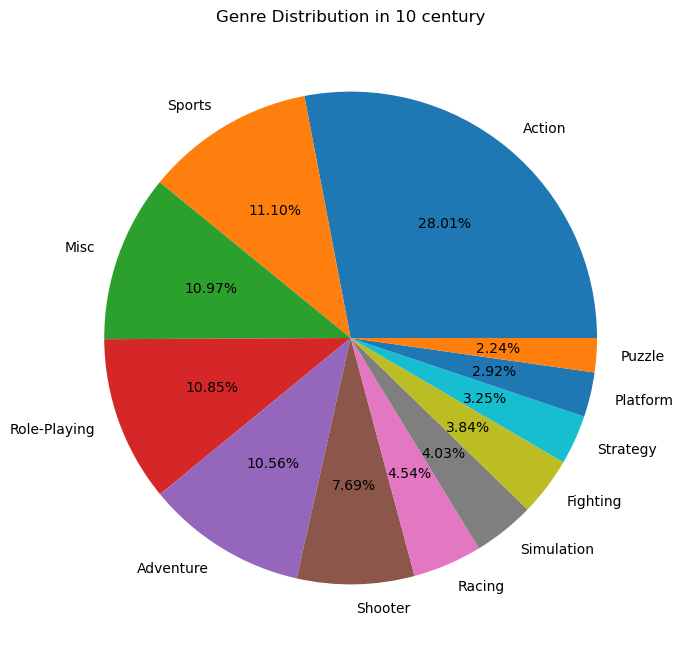

In [36]:
# 10 Century Genre Distribution
plt.figure(figsize=(15,8))
plt.pie(x=g4['Genre'], labels=g4['index'], autopct='%.2f%%')
plt.title('Genre Distribution in 10 century')

### Observation:
1. Action is the most popular genre. (It has the highest percentage across 2 decades, and showed an increasing trend in genre proportion.)
2. Puzzle is the least popular genre. (It has the lowest percentage across 2 decades, and showed a decreasing trend in genre proportion.)
3. For the latest trend for genre is action, sports, and misc, which contributes to nearly half of the published games. (50.08%)

Text(0, 0.5, 'Sales')

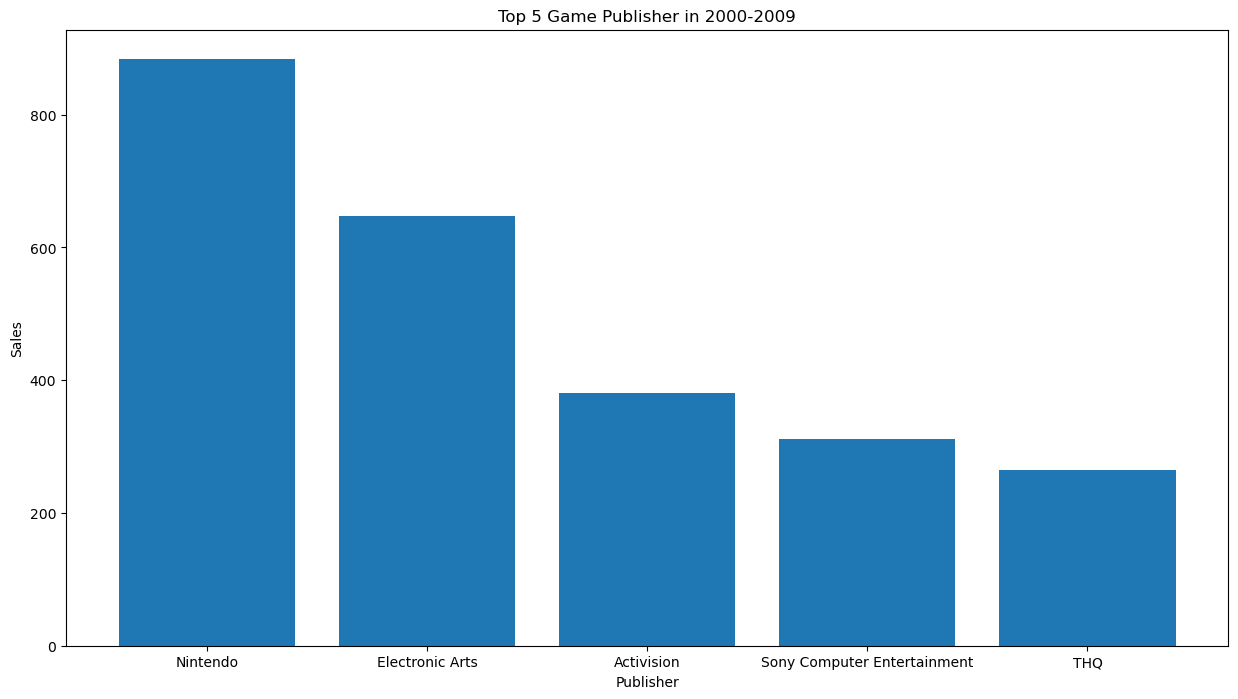

In [37]:
# EDA 2: Find publisher who has the best sales

PG00 = c00.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).reset_index().head()

# Viz
plt.figure(figsize=(15,8))
plt.bar(x=PG00['Publisher'], height=PG00['Global_Sales'])
plt.title('Top 5 Game Publisher in 2000-2009')
plt.xlabel('Publisher')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

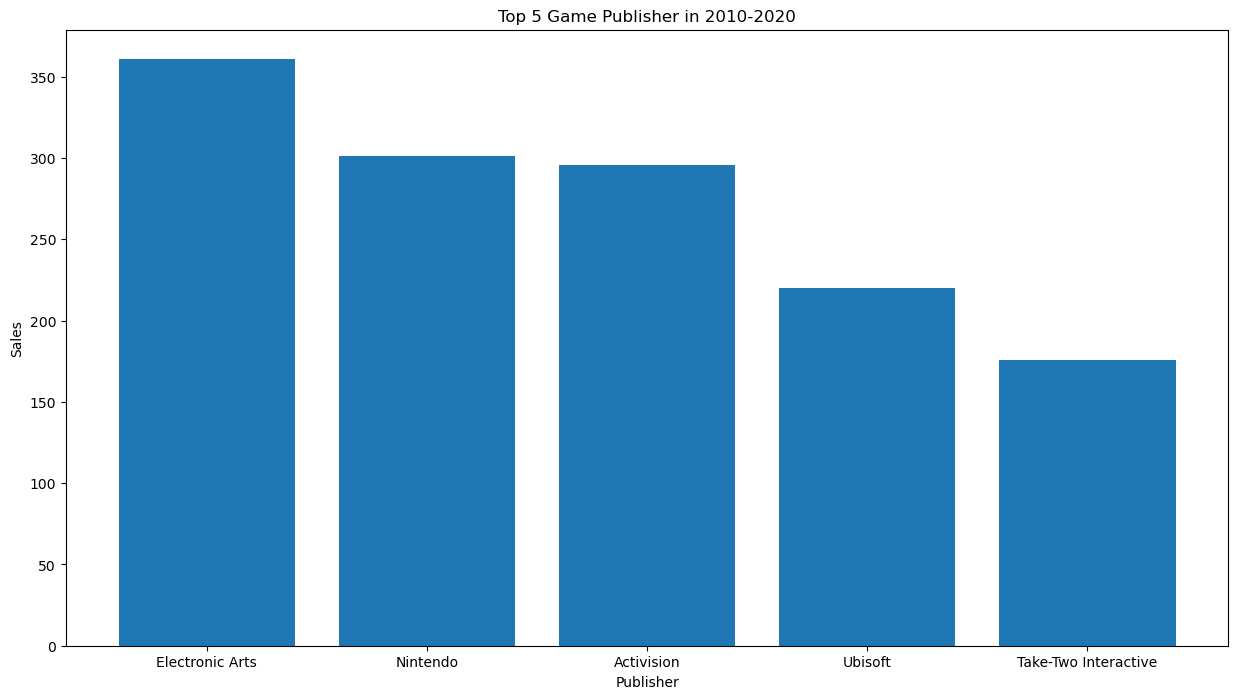

In [38]:
PG10 = c10.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).reset_index().head()

# Viz
plt.figure(figsize=(15,8))
plt.bar(x=PG10['Publisher'], height=PG10['Global_Sales'])
plt.title('Top 5 Game Publisher in 2010-2020')
plt.xlabel('Publisher')
plt.ylabel('Sales')

### Observation:
- Nintendo, Electronic Arts, and Activision Publisher are the top 3 publishers in the video game industry
- However, for the fourth and fifth place, it didn't show an apparent patterns, 2000-2009 is Sony and THQ,
- 2010-2020 is Ubisoft and Take-Two interactive

In [39]:
# EDA 3 Which region has the best sales.
# NA Sales vs. EU Sales vs. JP Sales (00 century)
print(round(c00['NA_Sales'].sum() / c00['Global_Sales'].sum() * 100))
print(round(c00['EU_Sales'].sum() / c00['Global_Sales'].sum() * 100))
print(round(c00['JP_Sales'].sum() / c00['Global_Sales'].sum() * 100))


52
27
11


In [40]:
# NA Sales vs. EU Sales vs. JP Sales (10 century)
print(round(c10['NA_Sales'].sum() / c10['Global_Sales'].sum() * 100))
print(round(c10['EU_Sales'].sum() / c10['Global_Sales'].sum() * 100))
print(round(c10['JP_Sales'].sum() / c10['Global_Sales'].sum() * 100))

44
33
12


In [41]:
# EDA 3 What platform earn money the most?
# 00 century (2000-2009)

c00.groupby(['Platform'])['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)

,Platform,Global_Sales
8,PS2,1227.36
1,DS,689.25
12,Wii,677.48
13,X360,412.65
9,PS3,346.91
3,GBA,305.62
14,XB,252.09
10,PSP,227.44
4,GC,197.14
7,PS,140.54


In [42]:
#10 century (2010-2020)

c10.groupby(['Platform'])['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)

,Platform,Global_Sales
4,PS3,602.44
10,X360,556.95
5,PS4,278.10
0,3DS,246.27
8,Wii,232.33
11,XOne,141.06
1,DS,129.64
2,PC,119.78
9,WiiU,81.86
6,PSP,64.27


## <span style='color:Red'> **Summary**   </span>

1. Video games sales has been increasing in 1980 to 2008, however, it has started decline after 2008.
2. NA has the largest video sales from 2000-2020, which contribute over 44% of the global sales.
3. Nintendo, Electronic Arts, and Activision Publisher are the top 3 sales companies in the industry.
4. Most popular video games platform are Playstation and xbox 360.
5. Most popular genre video games are action, sports, and misc.

### Thanks you for your time, wish you have a nice day :)
